<a href="https://colab.research.google.com/github/rpark3/ECON3916-Statistical-Machine-Learning/blob/main/Lab%203%20/%20Lab_3_Visualizing_Development_with_WBGAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
!pip install wbgapi
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define Economies: CHN (China), UMC (Upper Middle Income), WLD (World)
country_codes = ['CHN', 'UMC', 'WLD']

indicators = {
    'NY.GDP.PCAP.KD': 'GDP_Per_Capita_Const',     # Standard of Living
    'SL.TLF.CACT.ZS': 'Labor_Part_Rate',          # Labor Supply
    'SL.UEM.TOTL.ZS': 'Unemployment_Rate',        # Labor Friction
    'SL.TLF.TOTL.IN': 'Labor_Force_Total',        # Total Workers
    'NY.GDP.MKTP.KD': 'GDP_Const',                # Economic Size
    'FP.CPI.TOTL.ZG': 'Inflation_CPI',            # Stability
    'NY.GDS.TOTL.ZS': 'Gross_Dom_Savings',        # Savings
    'NE.GDI.TOTL.ZS': 'Gross_Cap_Formation',      # Investment
    'NE.EXP.GNFS.ZS': 'Exports_GDP',              # Exports
    'NE.IMP.GNFS.ZS': 'Imports_GDP',              # Imports
    'GC.TAX.TOTL.GD.ZS': 'Tax_Rev_GDP',           # Gov Revenue
    'NE.CON.GOVT.ZS': 'Gov_Exp_GDP'               # Gov Spending
}

In [60]:
# 1. Fetch Data
print("Fetching data...")
df_raw = wb.data.DataFrame(indicators, economy=country_codes, time=range(2000, 2025))

# 2. Transpose (Flip Rows/Cols)
df = df_raw.T

# 3. Clean Index
df.index = df.index.str.replace('YR', '').astype(int)
df.index.name = 'Year'
df = df.sort_index()

# 4. Rename Columns
df.rename(columns=indicators, level=1, inplace=True)

# 5. Extract China for specific calculations
df_CHN = df.xs('CHN', axis=1, level=0).copy()

Fetching data...


In [61]:
# 1. Natural Rate of Unemployment (5-Year MA)
df_CHN['Natural_Rate_Unemp'] = df_CHN['Unemployment_Rate'].rolling(window=5).mean()

# 2. Productivity (Output per Worker)
df_CHN['Productivity'] = df_CHN['GDP_Const'] / df_CHN['Labor_Force_Total']

# 3. Net Capital Outflow (Exports - Imports)
df_CHN['NCO'] = df_CHN['Exports_GDP'] - df_CHN['Imports_GDP']

# 4. Budget Balance (Tax - Spending)
df_CHN['Budget_Balance'] = df_CHN['Tax_Rev_GDP'] - df_CHN['Gov_Exp_GDP']

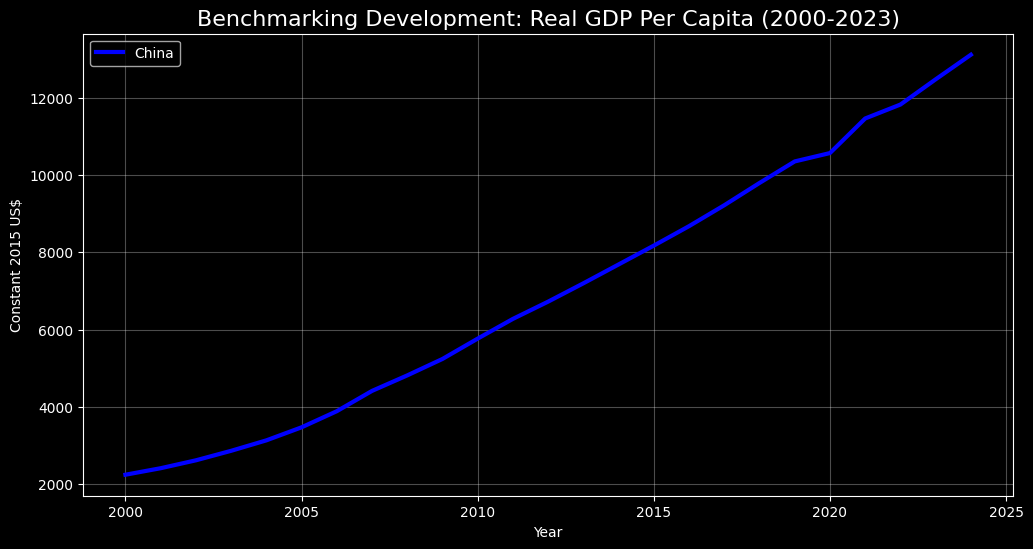

In [62]:
plt.figure(figsize=(12, 6))
# Plot ONLY China
plt.plot(df.index, df[('CHN', 'GDP_Per_Capita_Const')], label='China', color='blue', linewidth=3)
plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.ylabel('Constant 2015 US$')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

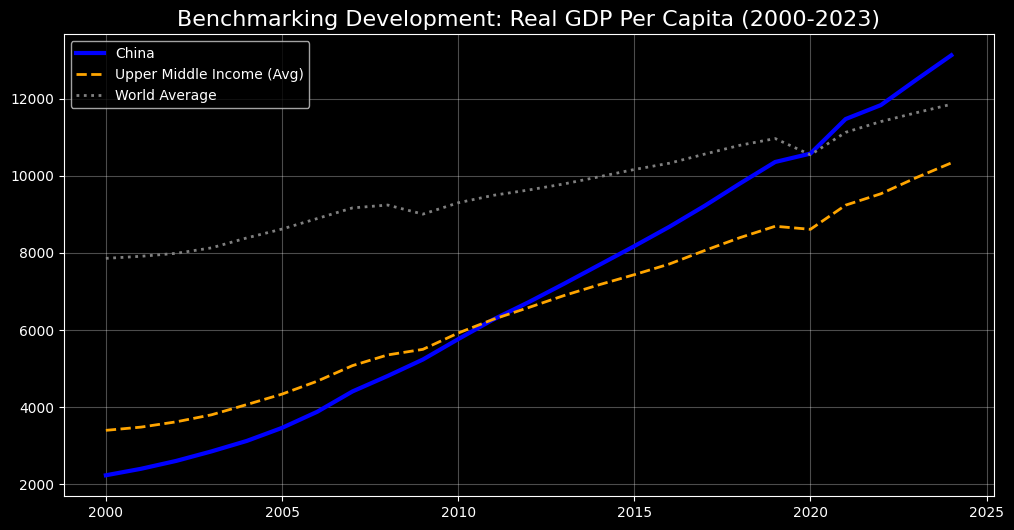

In [63]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[('CHN', 'GDP_Per_Capita_Const')], label='China', color='blue', linewidth=3)
# ADD THESE LINES
plt.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], label='Upper Middle Income (Avg)', color='orange', linestyle='--', linewidth=2)
plt.plot(df.index, df[('WLD', 'GDP_Per_Capita_Const')], label='World Average', color='grey', linestyle=':', linewidth=2)

plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

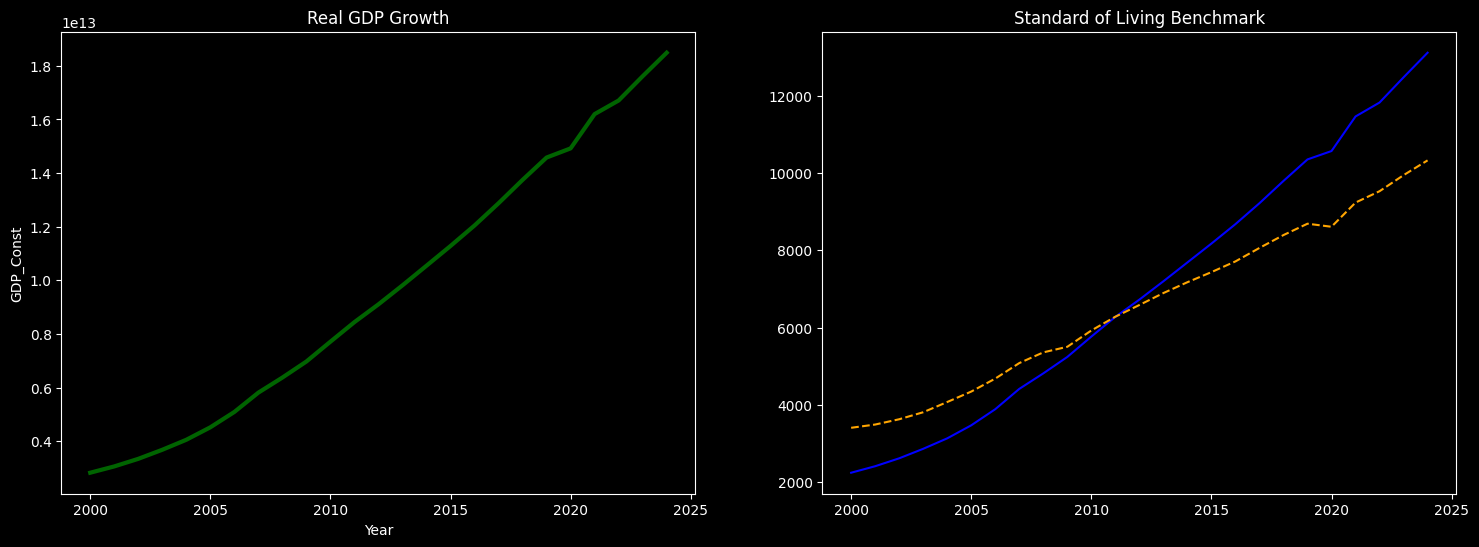

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Chart A: Total GDP
sns.lineplot(data=df_CHN, x=df_CHN.index, y='GDP_Const', color='darkgreen', linewidth=3, ax=ax1)
ax1.set_title('Real GDP Growth')

# Chart B: GDP Per Capita Benchmark
ax2.plot(df.index, df[('CHN', 'GDP_Per_Capita_Const')], color='blue')
ax2.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], color='orange', linestyle='--')
ax2.set_title('Standard of Living Benchmark')
plt.show()

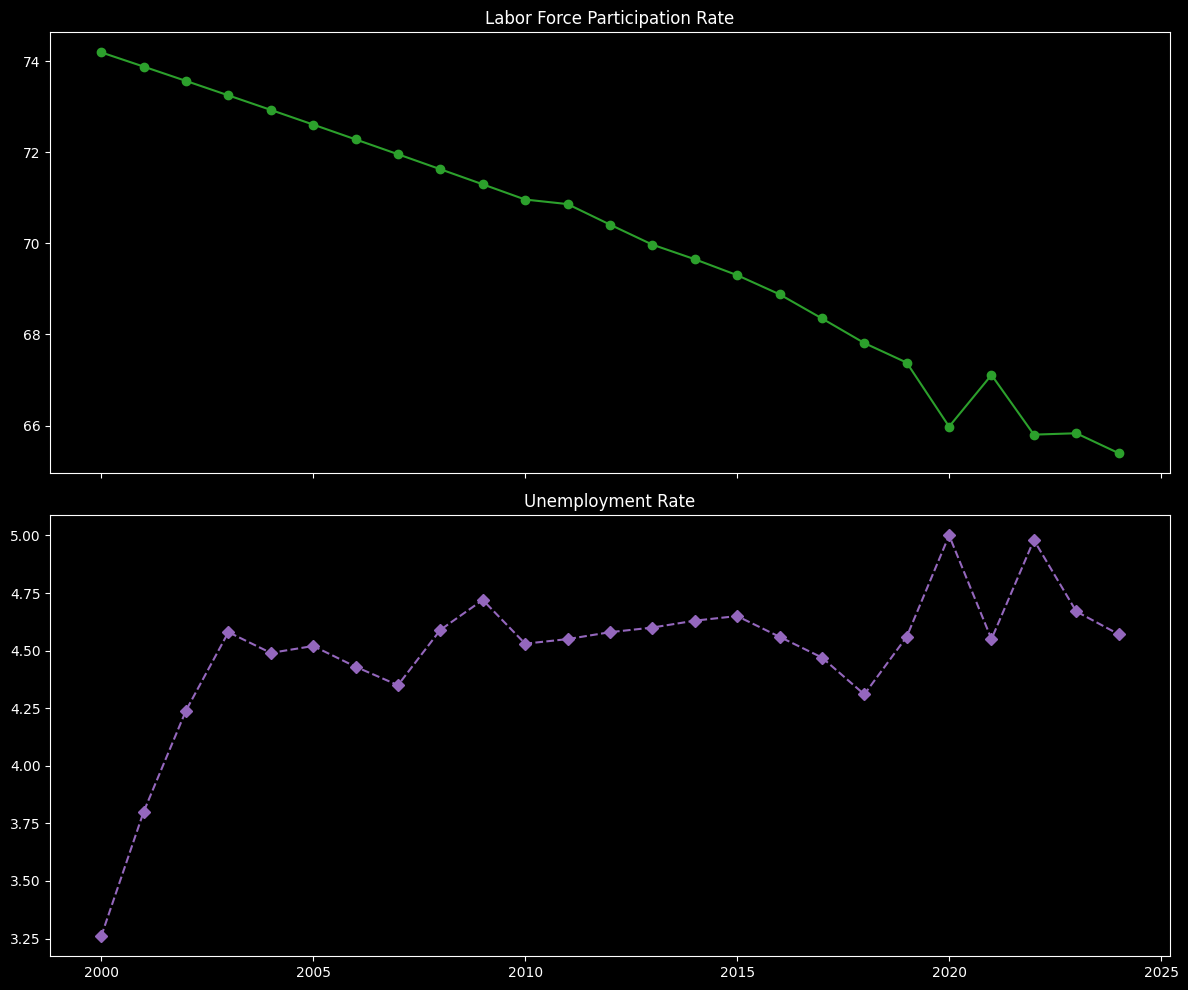

In [65]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Top: Participation
ax1.plot(df_CHN.index, df_CHN['Labor_Part_Rate'], color='tab:green', marker='o')
ax1.set_title('Labor Force Participation Rate')

# Bottom: Unemployment
ax2.plot(df_CHN.index, df_CHN['Unemployment_Rate'], color='tab:purple', marker='D', linestyle='--')
ax2.set_title('Unemployment Rate')
plt.tight_layout()
plt.show()

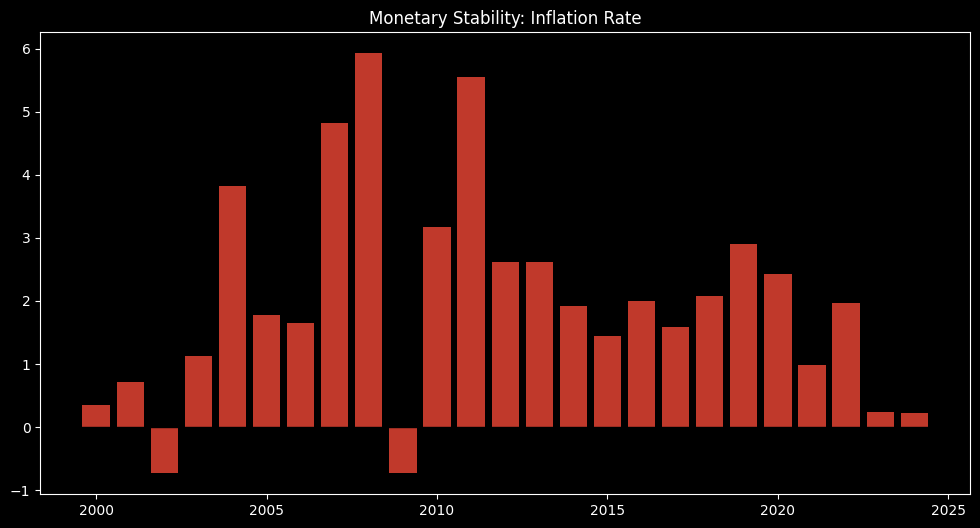

In [66]:
plt.figure(figsize=(12, 6))

plt.bar(df_CHN.index, df_CHN['Inflation_CPI'], color='#c0392b')

plt.axhline(0, color='black', linewidth=1)
plt.title('Monetary Stability: Inflation Rate')
plt.show()

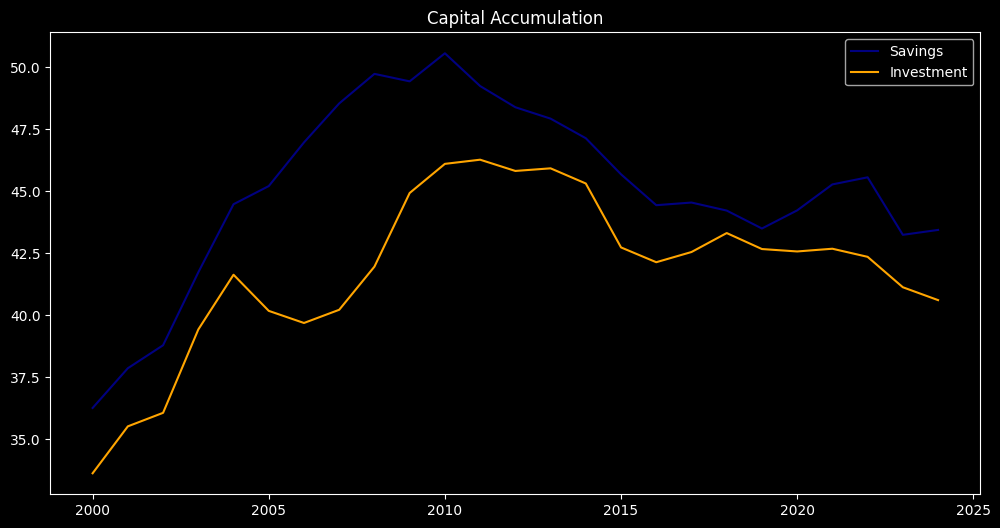

In [67]:
plt.figure(figsize=(12, 6))
plt.plot(df_CHN.index, df_CHN['Gross_Dom_Savings'], label='Savings', color='navy')
plt.plot(df_CHN.index, df_CHN['Gross_Cap_Formation'], label='Investment', color='orange')
plt.title('Capital Accumulation')
plt.legend()
plt.show()

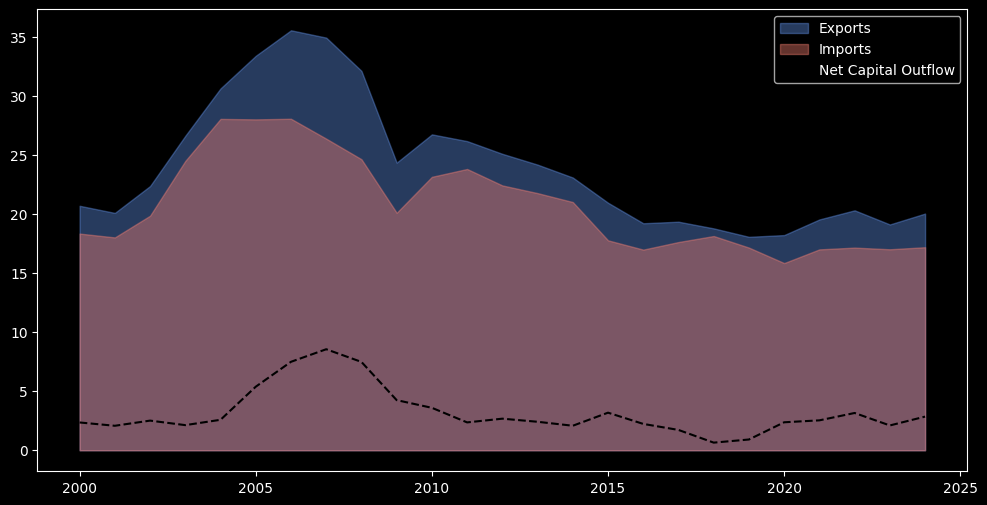

In [68]:
plt.figure(figsize=(12, 6))
plt.fill_between(df_CHN.index, df_CHN['Exports_GDP'], color='cornflowerblue', alpha=0.4, label='Exports')
plt.fill_between(df_CHN.index, df_CHN['Imports_GDP'], color='salmon', alpha=0.4, label='Imports')
plt.plot(df_CHN.index, df_CHN['NCO'], color='black', linestyle='--', label='Net Capital Outflow')
plt.legend()
plt.show()

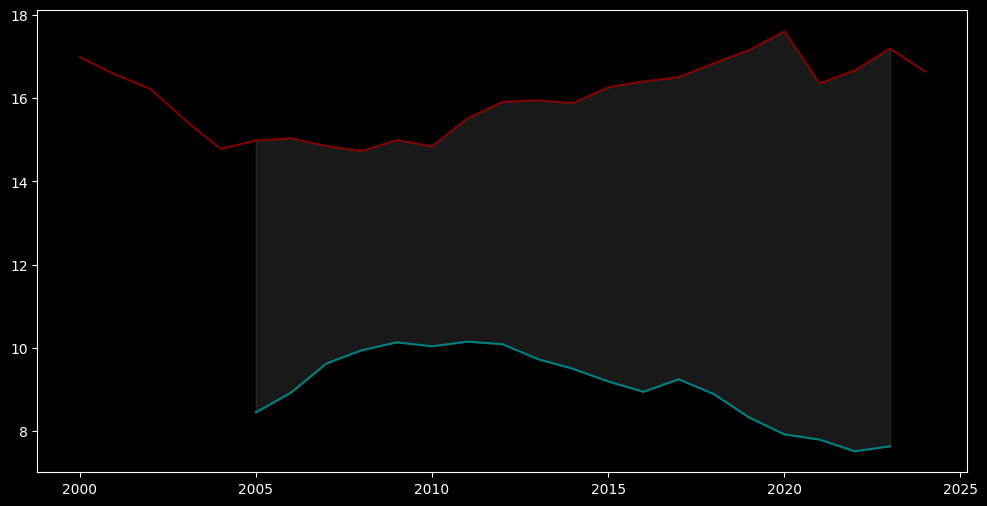

In [69]:
plt.figure(figsize=(12, 6))
plt.plot(df_CHN.index, df_CHN['Tax_Rev_GDP'], label='Revenue', color='teal')
plt.plot(df_CHN.index, df_CHN['Gov_Exp_GDP'], label='Expenditure', color='maroon')
plt.fill_between(df_CHN.index, df_CHN['Tax_Rev_GDP'], df_CHN['Gov_Exp_GDP'], color='gray', alpha=0.2)
plt.show()

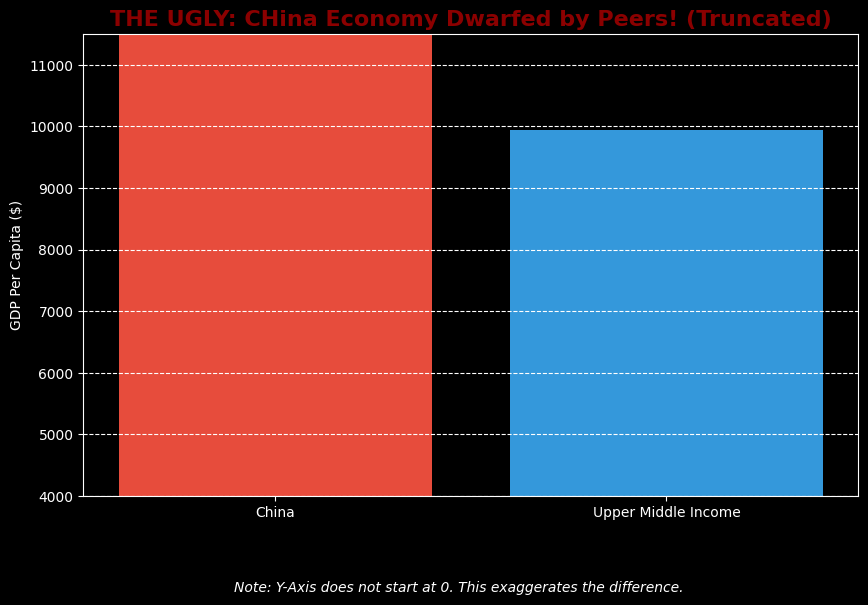

In [72]:
# THE UGLY CHART
# Setup snapshot data for the latest available year
snapshot_year = 2023
CHN_val = df.loc[snapshot_year, ('CHN', 'GDP_Per_Capita_Const')]
umc_val = df.loc[snapshot_year, ('UMC', 'GDP_Per_Capita_Const')]

values = [CHN_val, umc_val]
labels = ['China', 'Upper Middle Income']

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['#e74c3c', '#3498db'])

# THE VIOLATION: Truncating the axis
# ChinChinaox 4600. UMC is approx 11000.
# Starting axis at 4000 makes CHN look tiny.
plt.ylim(4000, 11500)

plt.title('THE UGLY: CHina Economy Dwarfed by Peers! (Truncated)', fontsize=16, fontweight='bold', color='darkred')
plt.ylabel('GDP Per Capita ($)')
plt.grid(axis='y', linestyle='--')
plt.figtext(0.5, -0.05, "Note: Y-Axis does not start at 0. This exaggerates the difference.", ha="center", style='italic')

plt.show()

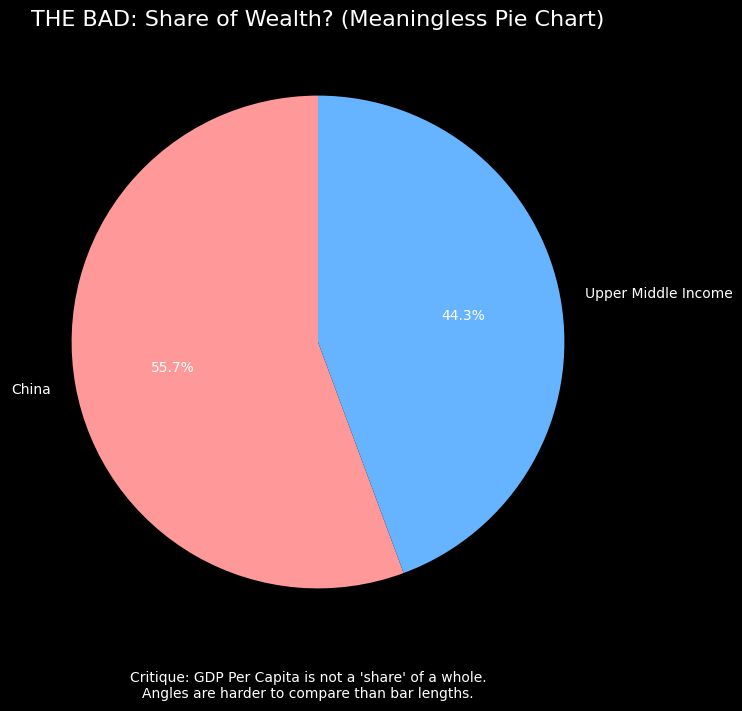

In [74]:
# CELL 9: THE BAD CHART
plt.figure(figsize=(8, 8))

# THE VIOLATION: Using a Pie Chart for non-summable data (GDP Per Capita)
# Comparison of magnitudes should be a Bar Chart, not angles.
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)

plt.title('THE BAD: Share of Wealth? (Meaningless Pie Chart)', fontsize=16)
plt.figtext(0.5, 0.05, "Critique: GDP Per Capita is not a 'share' of a whole.\nAngles are harder to compare than bar lengths.", ha="center")

plt.show()

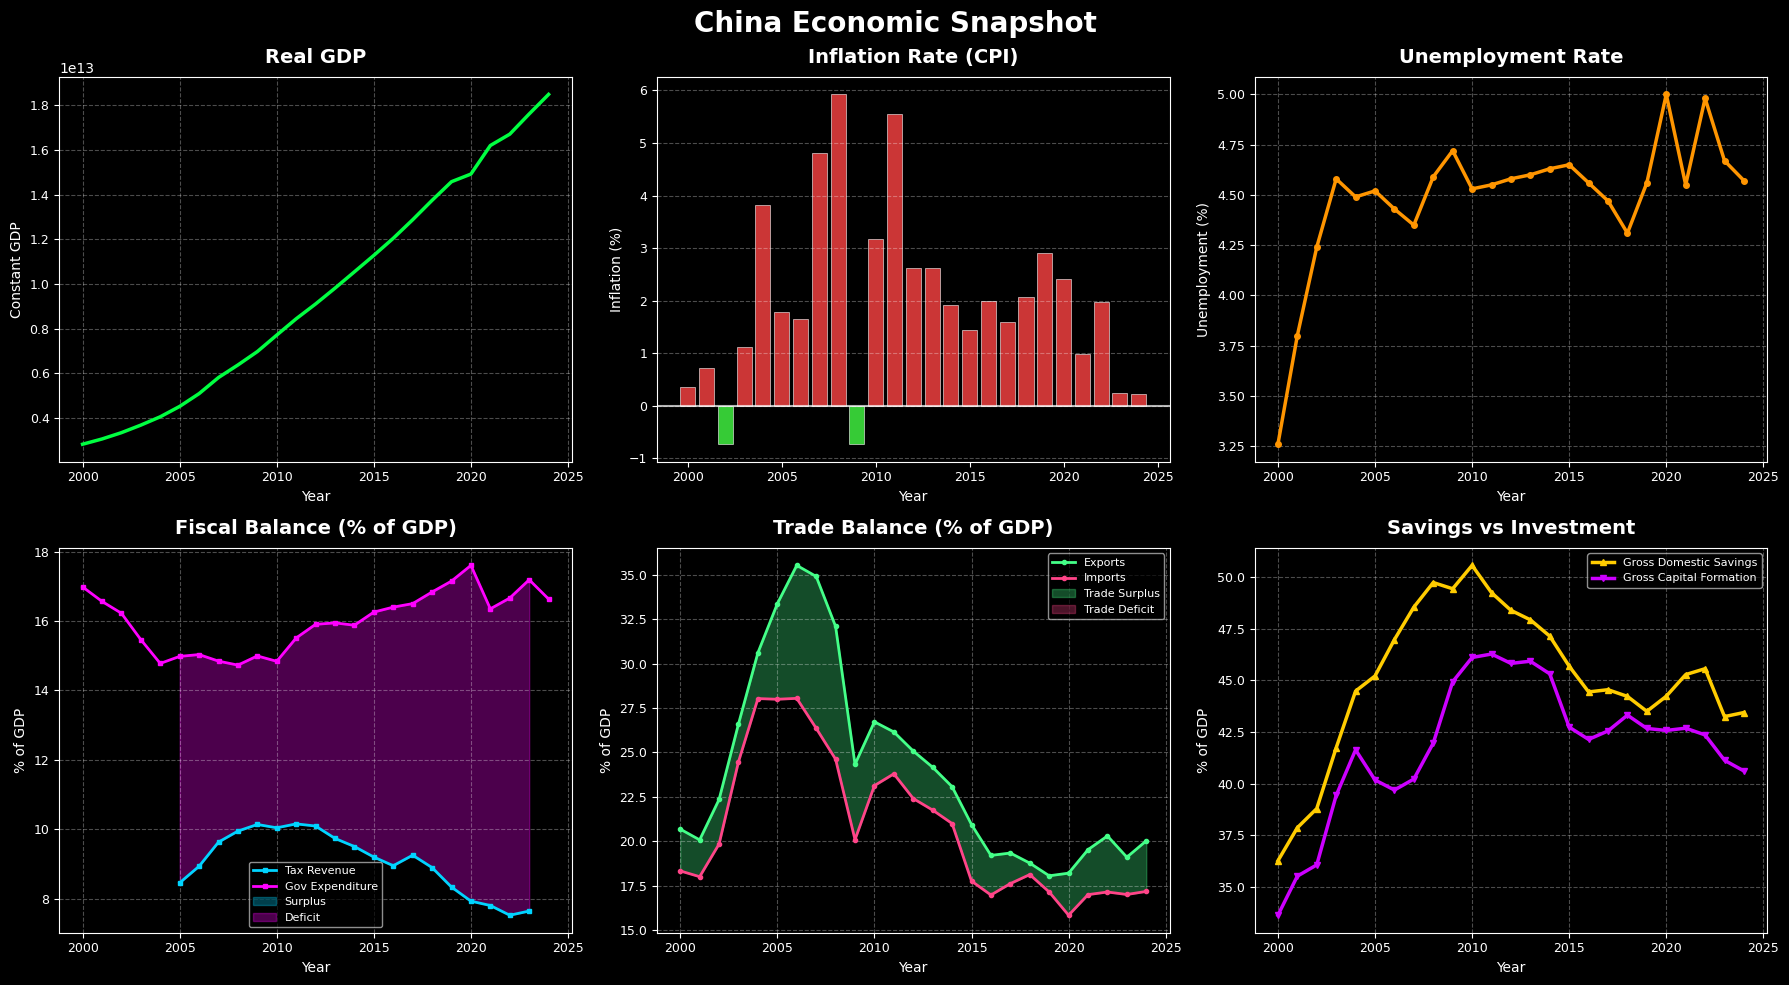

In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set dark background style
plt.style.use('dark_background')

# Create figure with 2x3 subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('China Economic Snapshot', fontsize=20, fontweight='bold', y=0.98)

# Assuming df_CHN is your DataFrame with a datetime index or year column
# For demonstration, I'll show how to plot each panel
# Replace 'df_CHN' with your actual DataFrame variable

# 1. Top Left: Real GDP (Line chart)
ax1 = axes[0, 0]
ax1.plot(df_CHN.index, df_CHN['GDP_Const'], color='#00ff41', linewidth=2.5)
ax1.set_title('Real GDP', fontsize=14, fontweight='bold', pad=10)
ax1.set_xlabel('Year', fontsize=10)
ax1.set_ylabel('Constant GDP', fontsize=10)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.tick_params(labelsize=9)

# 2. Top Middle: Inflation Rate (Bar chart with horizontal line at 0)
ax2 = axes[0, 1]
colors = ['#ff4444' if x > 0 else '#44ff44' for x in df_CHN['Inflation_CPI']]
ax2.bar(df_CHN.index, df_CHN['Inflation_CPI'], color=colors, alpha=0.8, edgecolor='white', linewidth=0.5)
ax2.axhline(y=0, color='white', linestyle='-', linewidth=1.5, alpha=0.7)
ax2.set_title('Inflation Rate (CPI)', fontsize=14, fontweight='bold', pad=10)
ax2.set_xlabel('Year', fontsize=10)
ax2.set_ylabel('Inflation (%)', fontsize=10)
ax2.grid(True, alpha=0.3, linestyle='--', axis='y')
ax2.tick_params(labelsize=9)

# 3. Top Right: Unemployment Rate (Line chart)
ax3 = axes[0, 2]
ax3.plot(df_CHN.index, df_CHN['Unemployment_Rate'], color='#ff9500', linewidth=2.5, marker='o', markersize=4)
ax3.set_title('Unemployment Rate', fontsize=14, fontweight='bold', pad=10)
ax3.set_xlabel('Year', fontsize=10)
ax3.set_ylabel('Unemployment (%)', fontsize=10)
ax3.grid(True, alpha=0.3, linestyle='--')
ax3.tick_params(labelsize=9)

# 4. Bottom Left: Fiscal Balance (Fill area between Tax Revenue and Gov Expenditure)
ax4 = axes[1, 0]
ax4.plot(df_CHN.index, df_CHN['Tax_Rev_GDP'], color='#00d4ff', linewidth=2, label='Tax Revenue', marker='s', markersize=3)
ax4.plot(df_CHN.index, df_CHN['Gov_Exp_GDP'], color='#ff00ff', linewidth=2, label='Gov Expenditure', marker='s', markersize=3)
ax4.fill_between(df_CHN.index, df_CHN['Tax_Rev_GDP'], df_CHN['Gov_Exp_GDP'],
                  where=(df_CHN['Tax_Rev_GDP'] >= df_CHN['Gov_Exp_GDP']),
                  color='#00d4ff', alpha=0.3, interpolate=True, label='Surplus')
ax4.fill_between(df_CHN.index, df_CHN['Tax_Rev_GDP'], df_CHN['Gov_Exp_GDP'],
                  where=(df_CHN['Tax_Rev_GDP'] < df_CHN['Gov_Exp_GDP']),
                  color='#ff00ff', alpha=0.3, interpolate=True, label='Deficit')
ax4.set_title('Fiscal Balance (% of GDP)', fontsize=14, fontweight='bold', pad=10)
ax4.set_xlabel('Year', fontsize=10)
ax4.set_ylabel('% of GDP', fontsize=10)
ax4.legend(loc='best', fontsize=8, framealpha=0.7)
ax4.grid(True, alpha=0.3, linestyle='--')
ax4.tick_params(labelsize=9)

# 5. Bottom Middle: Trade Balance (Fill area between Exports and Imports)
ax5 = axes[1, 1]
ax5.plot(df_CHN.index, df_CHN['Exports_GDP'], color='#44ff88', linewidth=2, label='Exports', marker='o', markersize=3)
ax5.plot(df_CHN.index, df_CHN['Imports_GDP'], color='#ff4488', linewidth=2, label='Imports', marker='o', markersize=3)
ax5.fill_between(df_CHN.index, df_CHN['Exports_GDP'], df_CHN['Imports_GDP'],
                  where=(df_CHN['Exports_GDP'] >= df_CHN['Imports_GDP']),
                  color='#44ff88', alpha=0.3, interpolate=True, label='Trade Surplus')
ax5.fill_between(df_CHN.index, df_CHN['Exports_GDP'], df_CHN['Imports_GDP'],
                  where=(df_CHN['Exports_GDP'] < df_CHN['Imports_GDP']),
                  color='#ff4488', alpha=0.3, interpolate=True, label='Trade Deficit')
ax5.set_title('Trade Balance (% of GDP)', fontsize=14, fontweight='bold', pad=10)
ax5.set_xlabel('Year', fontsize=10)
ax5.set_ylabel('% of GDP', fontsize=10)
ax5.legend(loc='best', fontsize=8, framealpha=0.7)
ax5.grid(True, alpha=0.3, linestyle='--')
ax5.tick_params(labelsize=9)

# 6. Bottom Right: Savings vs Investment (Dual lines)
ax6 = axes[1, 2]
ax6.plot(df_CHN.index, df_CHN['Gross_Dom_Savings'], color='#ffcc00', linewidth=2.5, label='Gross Domestic Savings', marker='^', markersize=4)
ax6.plot(df_CHN.index, df_CHN['Gross_Cap_Formation'], color='#cc00ff', linewidth=2.5, label='Gross Capital Formation', marker='v', markersize=4)
ax6.set_title('Savings vs Investment', fontsize=14, fontweight='bold', pad=10)
ax6.set_xlabel('Year', fontsize=10)
ax6.set_ylabel('% of GDP', fontsize=10)
ax6.legend(loc='best', fontsize=8, framealpha=0.7)
ax6.grid(True, alpha=0.3, linestyle='--')
ax6.tick_params(labelsize=9)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()